In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
print(df.isnull().sum())
print(df.duplicated().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64
2


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df["Year"] = pd.to_datetime(df["Year"], format = '%Y').dt.year
df["Year"].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007])

In [ ]:
df['Car_Age'] = 2023 - df['Year']

In [ ]:
df = df.drop(columns = ["Car_Name", "Year"])
df.head()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [ ]:
df = pd.get_dummies(data = df, drop_first=True)
df.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


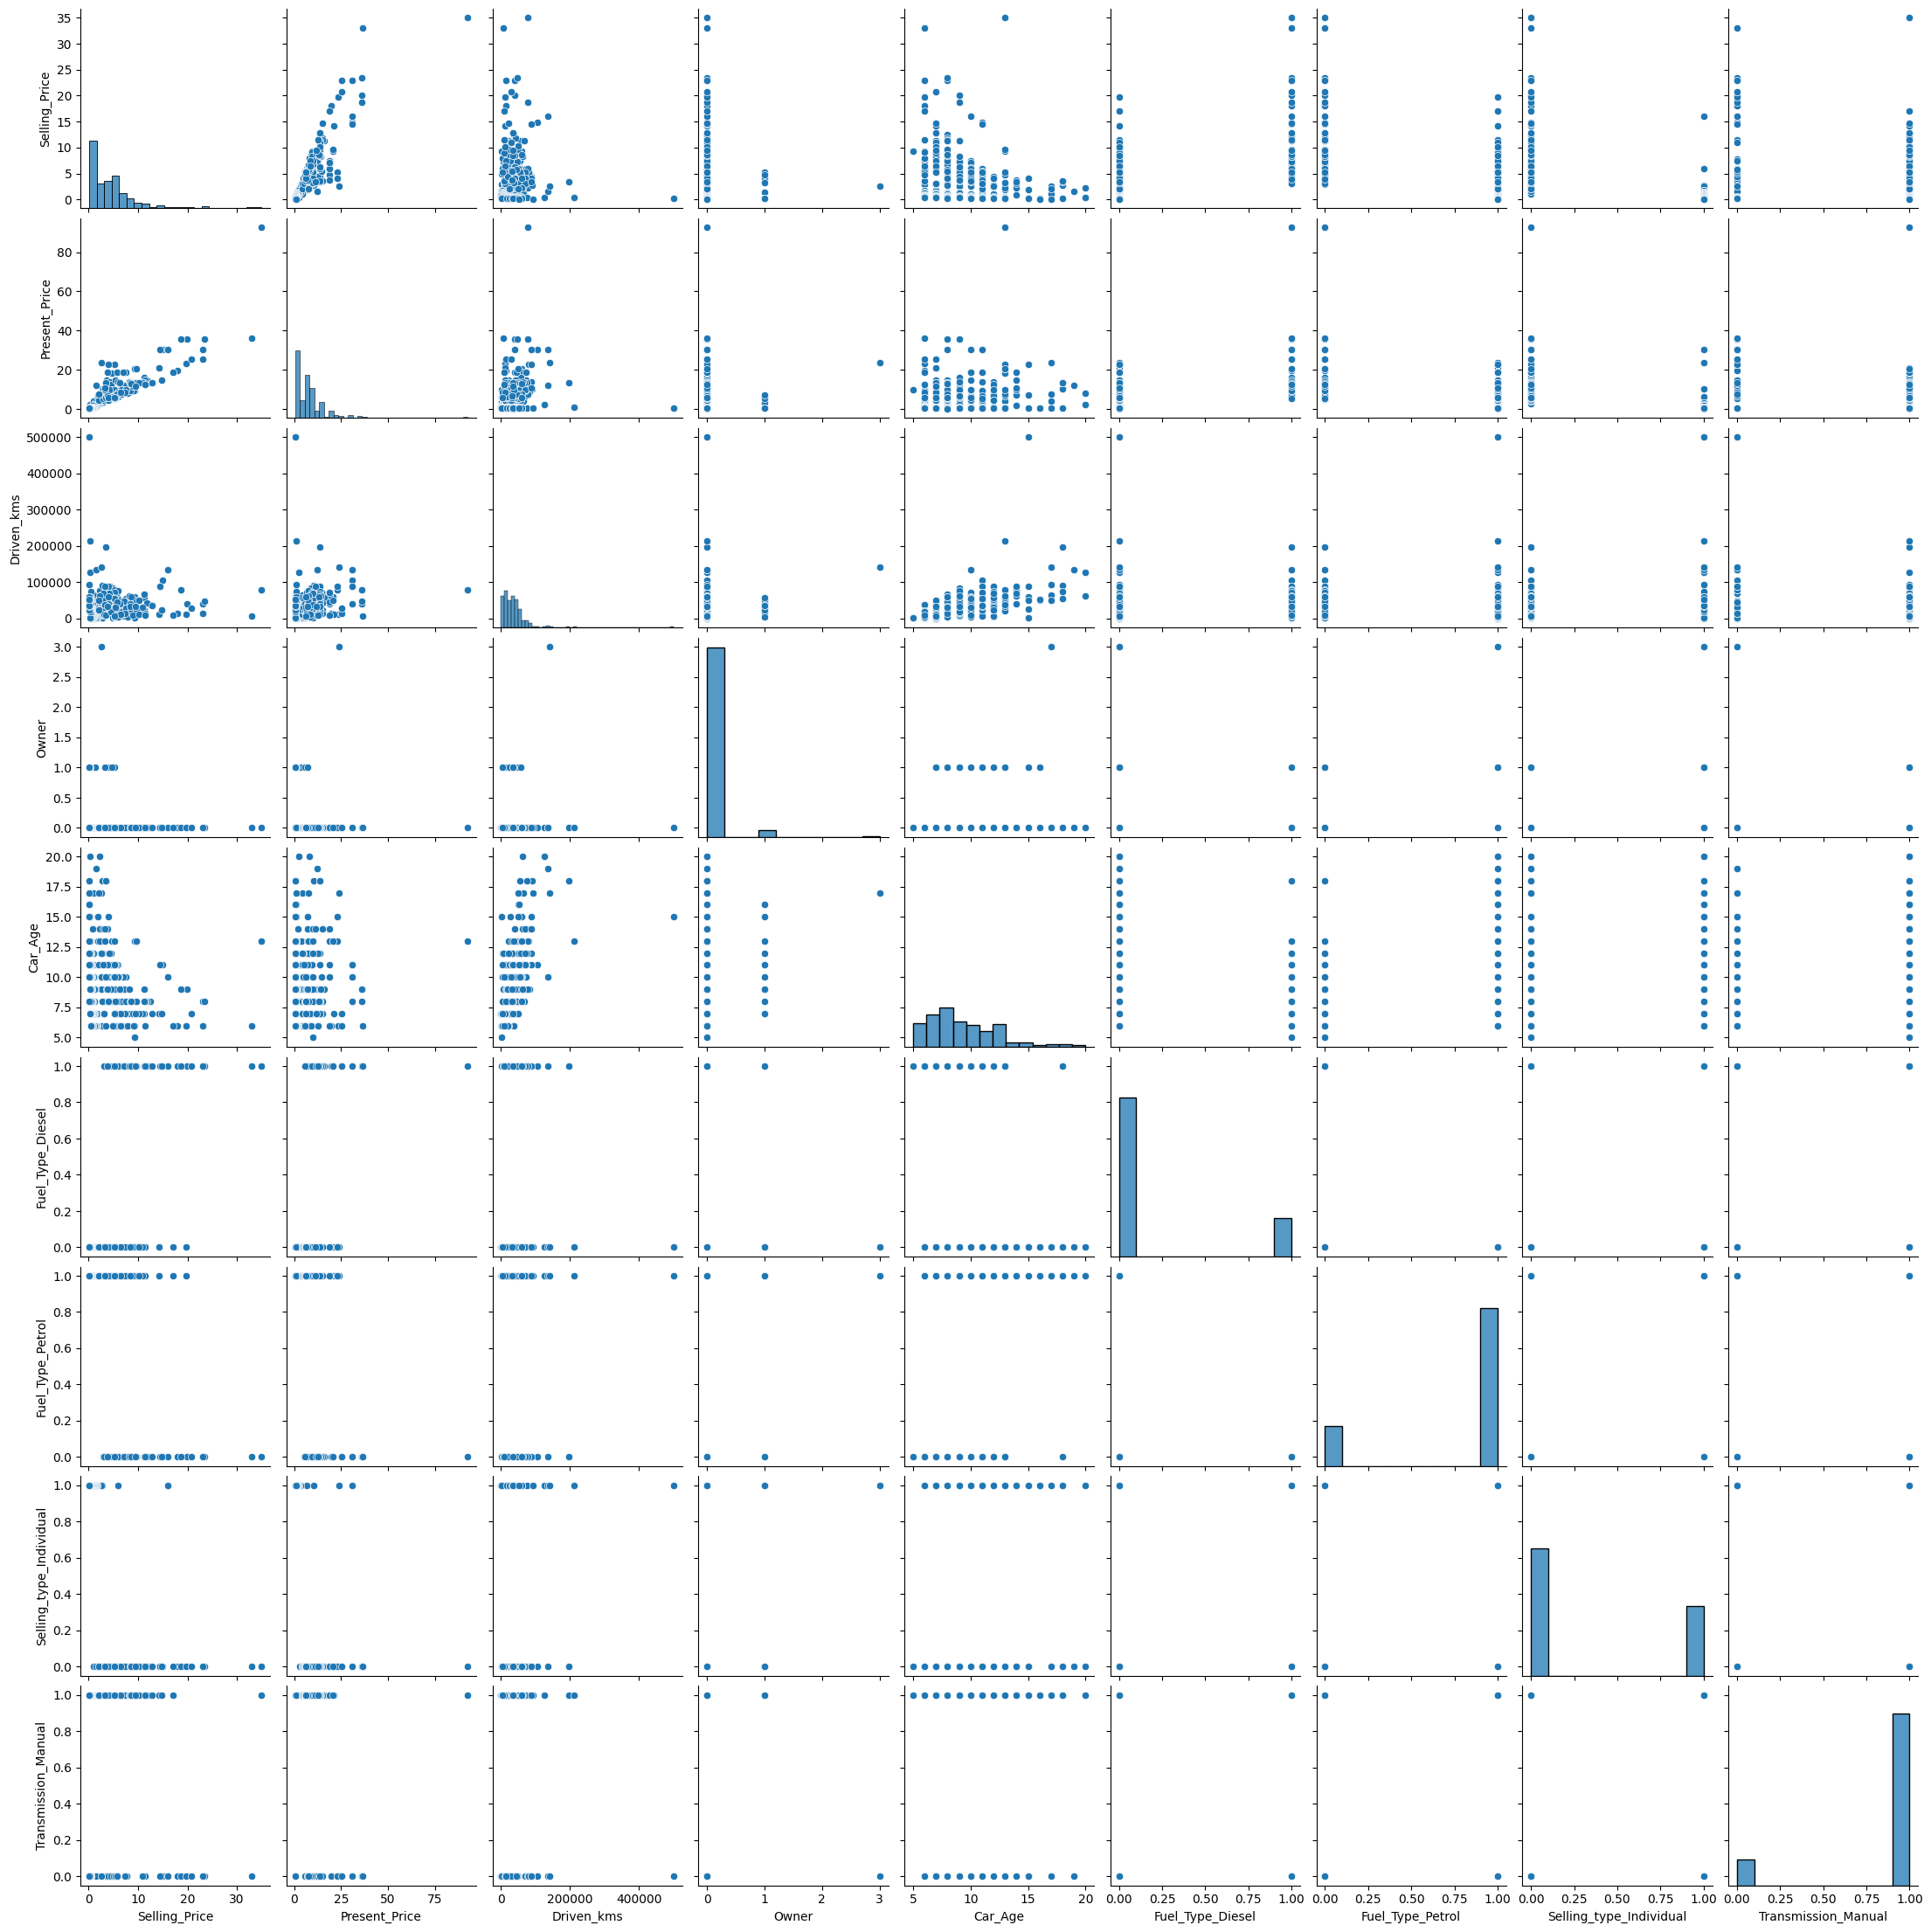

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(df)

<Axes: >

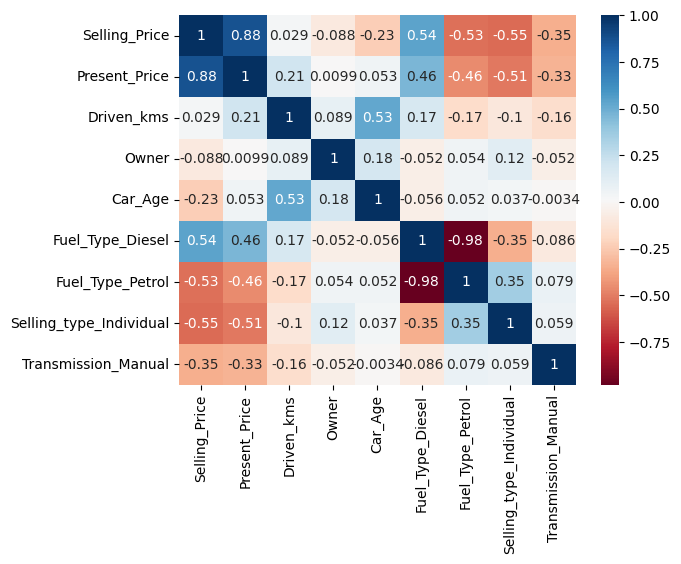

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap="RdBu")

In [ ]:
y = df['Selling_Price']
x = df.drop(columns = ['Selling_Price'])

ANALYSIS

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [ ]:
ypred = regressor.predict(x_test)
ypred

array([ 0.2366,  8.0032,  2.533 ,  1.4946,  4.3956, 15.5519,  4.237 ,
        0.5473, 13.8172,  1.2175,  2.944 ,  0.2161, 22.5275,  2.97  ,
        1.759 ,  2.4545,  4.8995, 19.8635,  7.5221,  7.2023,  6.7285,
        1.2332, 10.4012,  4.2485,  0.6295,  5.0148,  3.2695, 21.3628,
       11.9093,  0.2659,  7.2865,  1.0443,  2.861 ,  2.5405,  4.0895,
        4.541 ,  4.3341,  0.1879,  4.86  ,  0.4518,  5.7516,  7.0015,
       14.0337,  3.657 ,  5.3411,  1.022 ,  1.541 ,  6.0247,  5.176 ,
        9.183 ,  4.4925, 11.1519,  6.2816,  7.5231,  0.8124,  1.1789,
        2.9295,  7.2217,  2.5615,  0.6022])

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, ypred)

0.9185987125248781

In [ ]:
print(model.feature_importances_)

[0.42927203 0.03820021 0.00088885 0.08514353 0.07577489 0.02605509
 0.26037456 0.08429083]


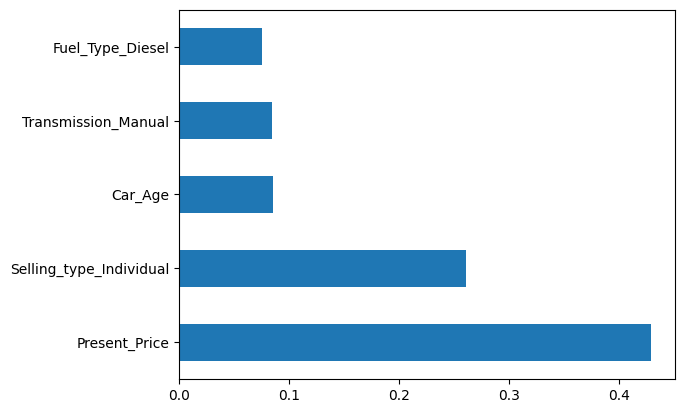

In [ ]:
feature_importances = pd.Series(model.feature_importances_, index = x.columns)
feature_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=5)

In [ ]:
x_train.shape

(239, 8)

In [ ]:
x_test.shape

(60, 8)

MODEL BUILDING

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)
ypred = regressor.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, ypred)
from sklearn.model_selection import RandomizedSearchCV
parameters = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'],  # Use valid criterion values
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}
random_cv = RandomizedSearchCV(estimator=regressor, param_distributions=parameters, n_iter=10,
                               scoring ='neg_mean_absolute_error',random_state=42, cv=5, verbose=2, n_jobs=-1)
random_cv.fit(x_train, y_train)
random_cv.best_params_
random_cv.best_score_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


-0.7866154518583031

In [ ]:
predictions=random_cv.predict(x_test)
sns.distplot(y_test-predictions)

Text(0, 0.5, 'y_test')

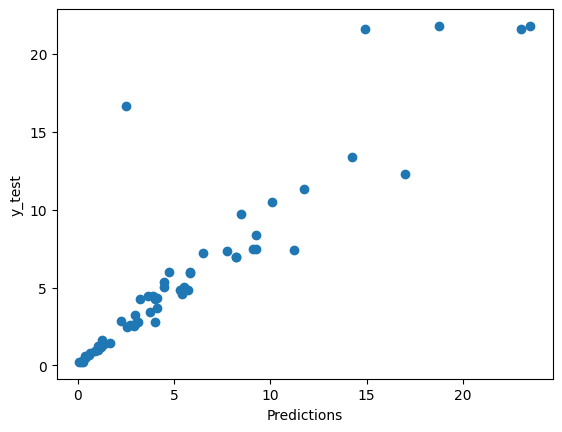

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel("Predictions")
plt.ylabel("y_test")

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.024864113699775
MSE: 5.350517068606706
RMSE: 2.3131184726698946


In [ ]:
single_ob = np.array([9.5, 43000, 0.0, 10.0, 1.0, 0.0, 0.0, 1.0])
single_ob = single_ob.reshape(1, -1)

In [ ]:
regressor.predict(single_ob)

array([5.2006])

In [ ]:
df.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


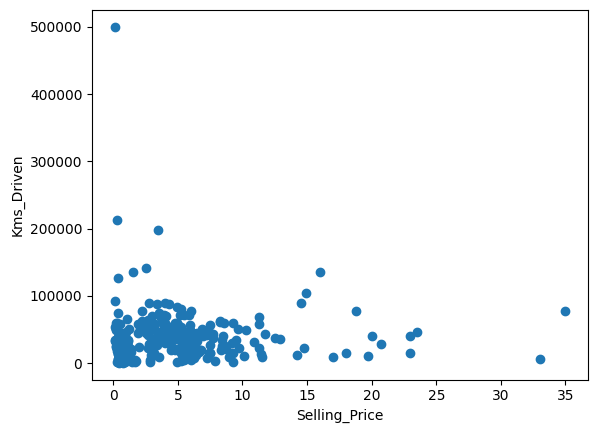

In [ ]:
SP = df["Selling_Price"]
kms = df["Driven_kms"]
plt.xlabel("Selling_Price")
plt.ylabel("Kms_Driven")
plt.scatter(SP, kms)